In [1]:
#import the right libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn as sk
import numpy as np

In this example we will use the wine dataset. This is also a very well known dataset for machine learning students. In this dataset we want classify 3 types of wine on the base of product variables.

In [2]:
#Load data from example datasets SK learn
from sklearn.datasets import load_wine
loaddata = load_wine()

After loading the dataset we can look at the summary.

In [3]:
#how does the data look like
print(loaddata['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Now that we know what the dataset is about we can move the data to a dataframe for analysis

In [4]:
#Dataframes are great for organizing your data.
#load all data into a dataframe
dfdata = pd.DataFrame(data=loaddata['data'],columns=loaddata['feature_names'])
dfdata['target']=loaddata['target']
dfdata['class']=dfdata['target'].map(lambda ind: loaddata['target_names'][ind])
dfdata.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


Pandas has very neat function calles describe; this shows the most important descriptive measures

In [5]:
#Pandas has a really great function called describe.
dfdata.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


One very important item to check in a classification project is balance. The data you use should be balanced in the amount of classes you have. Machine learning models tend to favor the majority class. If your data is unbalanced please use sampling methods to correct for this. Details about this are out of the scope of this project.

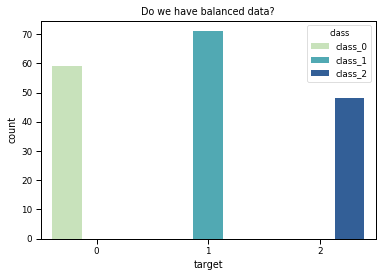

In [6]:
#We will do a classification task, an important part of EDA assesing of we have balanced classes.
sn.set_context('paper')

# create plot
sn.countplot(x = 'target', hue = 'class', data = dfdata, palette = 'YlGnBu')
plt.title('Do we have balanced data?')
plt.show()

We do see that there is a majority class and that is class 1. But the differences between the classes isn't that big, so we can proceed.

The next step is EDA, exploratory data analysis. 

In these case I used my favorite plots called pairplots, these will give a graph per variable combination.
It is a great way to see if there are correlations or cluster is your data.

C:\Users\Carlo.van.den.Boom\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Carlo.van.den.Boom\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


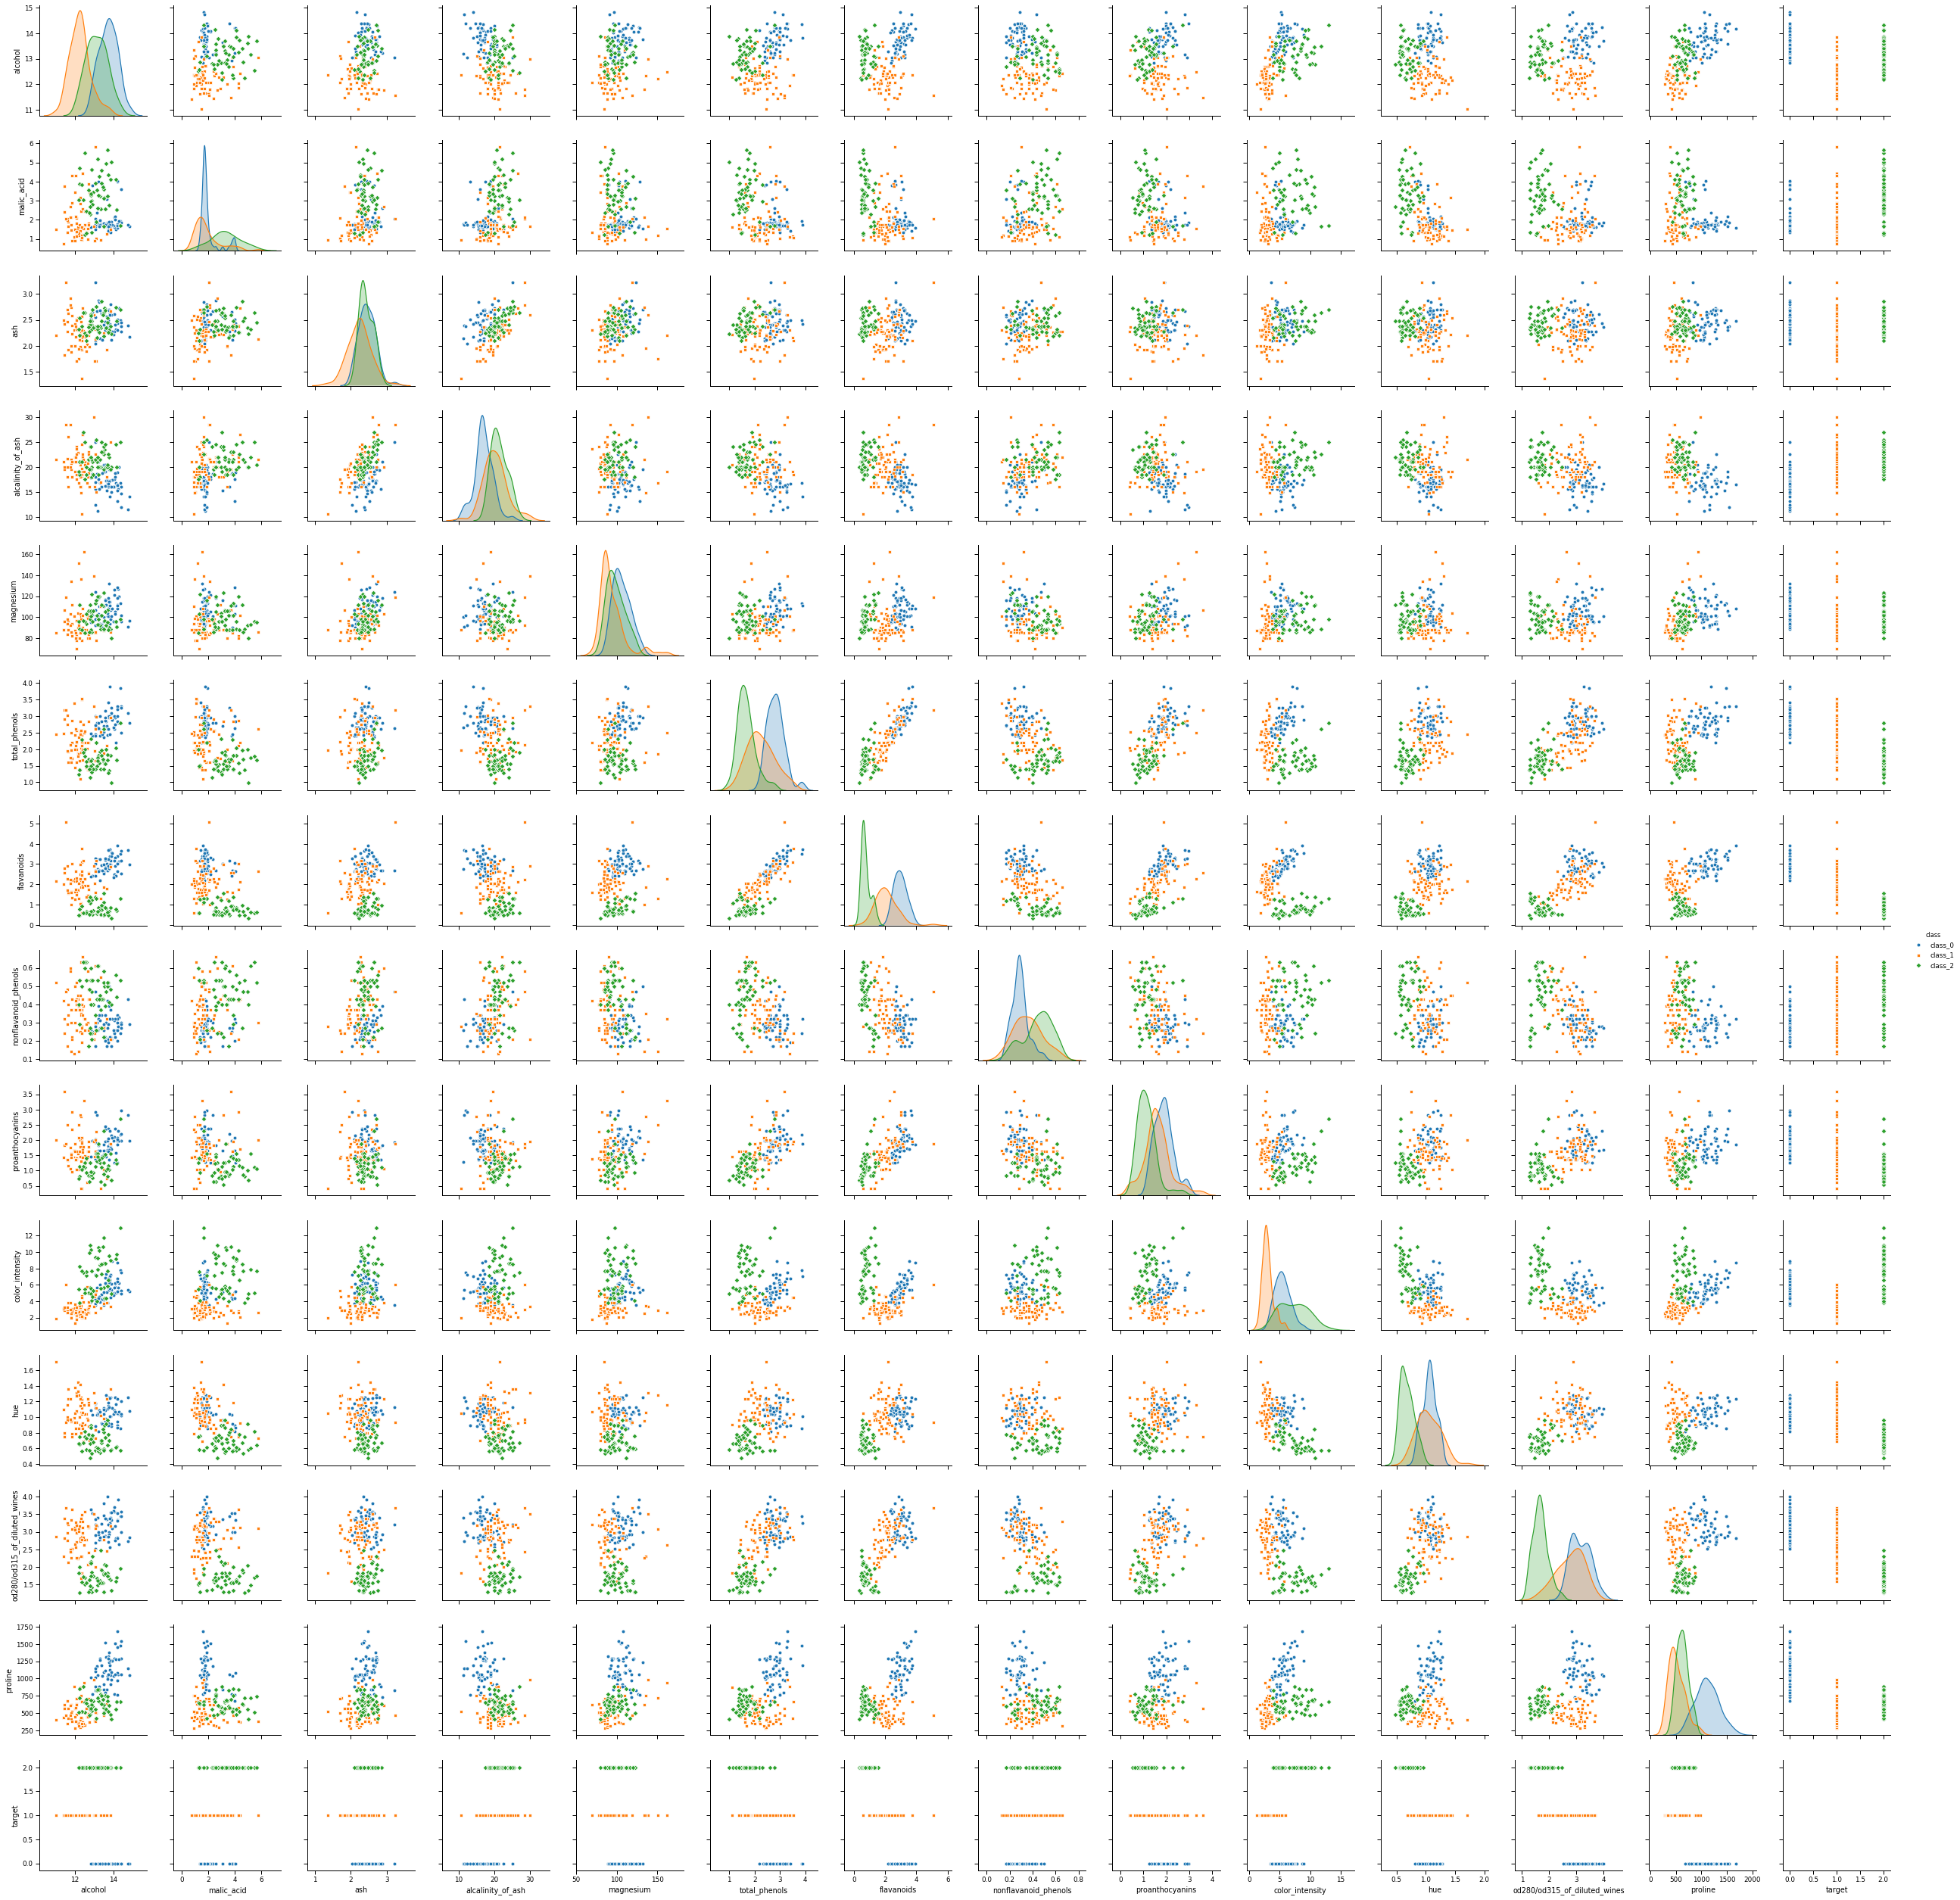

In [7]:
#Time for some Exploratory Data Analysis
#Lets do some pairplots
#classes are in three colors and have different symbols 
#as you see this is a bit much...
sn.pairplot(dfdata,hue = 'class',markers=["o", "s", "D"])

If you have a lot of variables this obviously doesn't work because the graphs become to small.
The great thing about pairplots is that you can also specify indiviual combinations of variables.

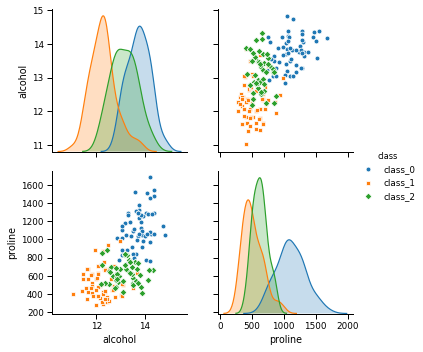

In [8]:
#Now we make some plots with specific variables
#looks nice, isn't it?

'''
alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline
'''

Yg="alcohol"
Xg="proline"

sn.pairplot(dfdata, vars=[Yg,Xg], hue = 'class', markers=["o", "s", "D"])

Another way of finding meaningfull correlations is a correlation plot.

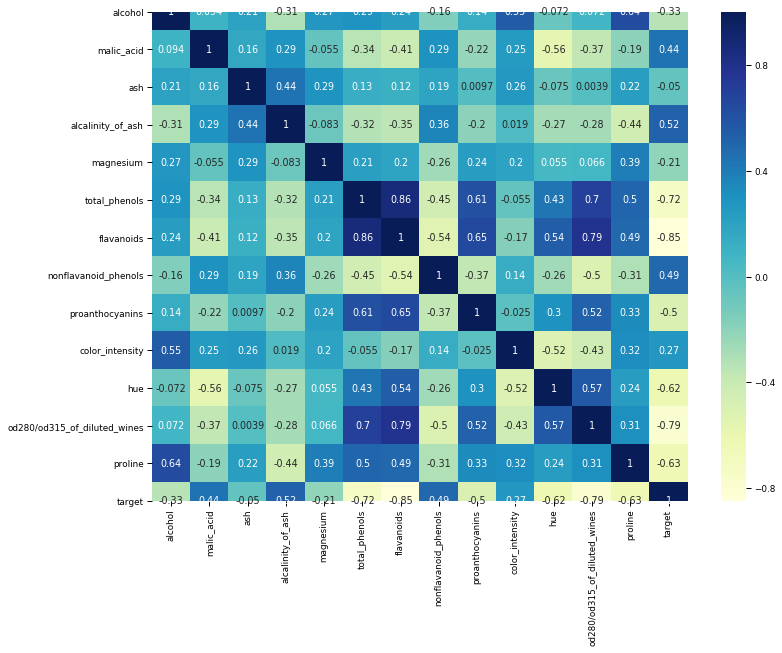

In [9]:
#lets investigate if there are meaningfull correlations
plt.figure(figsize=(12, 9))
corr = dfdata[dfdata.columns].corr()
sn.heatmap(corr, cmap="YlGnBu", annot = True)

As you can see there are three variable that are correlate with high degree to the target variable. These are "total flavanoids", "flavanoids", "od280/od315_of_diluted_wines". 

It is time to make the data ready for useing them in a machine learning model. We create first a dataframe for our X values.

In [10]:
#Make the data suitable for the models, lets call this new matrix DFFEAT.
#We will remove the the Y's in the data (the answers).
#This means that the answers in this maxtrix are your X's or independent variables

dffeat = dfdata.copy() #copy the dataframe from dfdata to dffeat
dffeat = dffeat.drop(['target','class'],axis=1) #remove the Y's
dffeat.head(5) #lets see the first of 5 rows

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


After we create a dataframe for our X values its time to do the same for the Y value (the answers)

In [11]:
#In the previous code we made the X's ready for the algorithms, now its time to make the Y's ready

dftarget = dfdata.copy() #copy the dataframe from dfdata
dftarget = dftarget.loc[:, ['target']]
dftarget.head(5)

,target
0,0
1,0
2,0
3,0
4,0


Lets assign names to the new dataframes, just to make it clear. Again: y is the class (the answer), X are your variables

In [17]:
#Make an Y & X
y =  dftarget[['target']].values.ravel()
X =  dffeat

After seperating the X and y variables its time to split the dataset into a training and test set.
Be aware that both the X and y variables need to be splitted, hence why we have: X_train, X_test, y_train, y_test 

In [18]:
from sklearn.model_selection import train_test_split

#test_size =0.3, this is the split between the trainings data (70%) and the test data (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

The data is now ready to fit an algorithm to, I have chosen three to give me a prediction. I hove chosen a decision tree, logistics regression and a random forrest. First import the algorithms in this script.


In [19]:
#time to fit some models to the data: 
#We use a KNN, logitic regression, decision tree and a Random Forrest
from sklearn.linear_model import LogisticRegression #lr
from sklearn import tree #dt
from sklearn.ensemble import RandomForestClassifier #rf

After importing the algorithms I will import the metrics. The metric I am going to use is accuracy because the dataset is balanced. In this dataset there isn't a really dominant class. Accuracy is also very easy to understand: its just the difference between predicted well or not calculated in a percentage.

In [43]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Random Forrest Classifier
rf=RandomForestClassifier(random_state=120, n_estimators = 100)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
rfm = metrics.accuracy_score(y_test, y_pred) *100
print("Random Forrest accuracy on test set:",rfm.round(2),'%')

#Create a Decision Tree
dt=tree.DecisionTreeClassifier(random_state=120)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
dtm= metrics.accuracy_score(y_test, y_pred) *100
print("Decision Tree accuracy on test set:",dtm.round(2),'%')

#Create a Logistic Regression
lr=LogisticRegression(random_state=120, multi_class='auto', solver ='lbfgs', max_iter = 10000 )
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
lrm = metrics.accuracy_score(y_test, y_pred) *100
print("Logistic Regression accuracy on test set:",lrm.round(2), '%')

Random Forrest accuracy on test set: 98.15 %
Decision Tree accuracy on test set: 88.89 %
Logistic Regression accuracy on test set: 96.3 %


The result: As you can see the randomforrest scored the highest of them all, followed by the decision tree. In everyday life these scores will normally be substancially lower. The dataset used in this script is of course very clean. The randomforrest is a very powerfull algorithm that can handle quite some complexity in the data. 